# Depth-First Search
## Packages

In [51]:
include("../Percolation.jl")
using Plots, ColorSchemes, LaTeXStrings, DelimitedFiles
import PyPlot as plt

## Configurations

In [52]:
figpath = "../../fig/percolation/"
rcParams = plt.PyDict(plt.matplotlib["rcParams"])
rcParams["text.usetex"] = true

true

## Grid and Path

In [85]:
prob, len = 0.58, 100
percent = Integer(round(prob * 100))

58

In [86]:
grid = rand(len, len) .<= prob
path = falses(len, len)

print(Percolation.dfspercolate!(grid, path))

# save data
open("grid-$percent.txt", "w") do io
    writedlm(io, Matrix{Int8}(grid))
end
open("path-$percent.txt", "w") do io
    writedlm(io, Matrix{Int8}(path))
end

true

In [87]:
# load data from previous runs
grid = readdlm("grid-$percent.txt", Bool)
path = readdlm("path-$percent.txt", Bool)
# state of percolation
print(any(path[end, :]))

true

## Plot

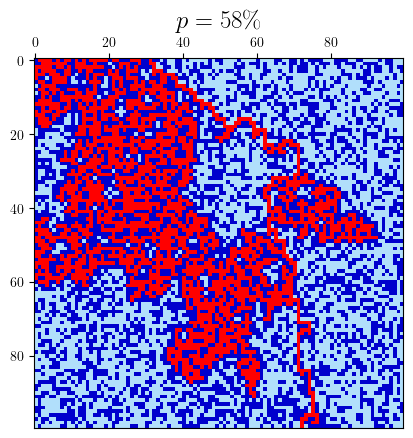

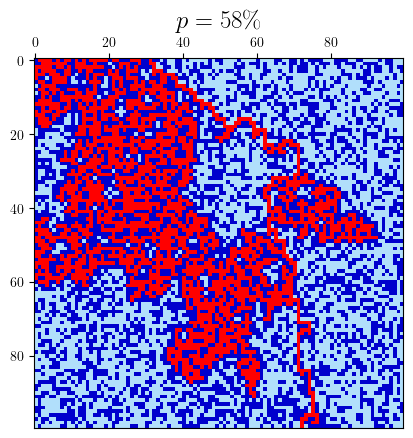

In [88]:
fig, ax = plt.subplots()
ax.xaxis.tick_top()
ax.set_title(L"p=%$(Integer(round(prob * 100)))\%", fontsize=18)

ax.imshow(grid, cmap=plt.ColorMap([colorant"mediumblue", colorant"rgba(135, 206, 250, 0.65)"]),
    interpolation="nearest")
ax.imshow(path, cmap=plt.ColorMap([colorant"transparent", colorant"red"]), interpolation="nearest")

plt.savefig(figpath * "dfs-$percent.pdf", bbox_inches="tight")
display(fig)